# Libraries

In [0]:
#essential libraries
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.utils import resample

#Geospatial libraries
#import geopandas as gpd
#import geoplot
#from shapely.geometry import Point, Polygon
#import geoplot.crs as gcrs

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#metrics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

#Time-series
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Reading data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving recruitment_code_test.csv to recruitment_code_test.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['recruitment_code_test.csv']))

In [8]:
df.head().transpose()

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [9]:
df.tail().transpose()

,48837,48838,48839,48840,48841
age,39,64,38,44,35
workclass,Private,NaN,Private,Private,Self-emp-inc
fnlwgt,215419,321403,374983,83891,182148
education,Bachelors,HS-grad,Bachelors,Bachelors,Bachelors
education-num,13,9,13,13,13
marital-status,Divorced,Widowed,Married-civ-spouse,Divorced,Married-civ-spouse
occupation,Prof-specialty,NaN,Prof-specialty,Adm-clerical,Exec-managerial
relationship,Not-in-family,Other-relative,Husband,Own-child,Husband
race,White,Black,White,Asian-Pac-Islander,White
sex,Female,Male,Male,Male,Male


In [10]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [11]:
df.shape

(48842, 15)

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# Helper Functions

In [0]:
def mean(col): #function that aggeregates and shows the means
    return df.groupby(col).mean().transpose()

In [0]:
def count(col): #function to count the number of examples for each desired category
    return df[col].value_counts()

In [0]:
def violin(col1,col2,hue): #function to visualise the violin plot
    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col1, y=col2, hue=hue,split=True,data=df)
    return ax

In [0]:
def joint(col1,col2): #function to visualise the joint plot
    ax=sns.jointplot(x=col1, y=col2, data=df, kind="kde")
    return ax

In [0]:
def correlation(df,size1,size2,cmap): #function to create the correlation matrix
    corr=df.corr()
    plt.figure(figsize=(size1,size2))
    ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap=cmap,annot=True)
    return ax

In [0]:
def dist_plot(col1,col2):
    g = sns.FacetGrid(df, col=col1)
    return g.map(sns.distplot, col2)

In [0]:
def count_plot(col,hue):
    return sns.countplot(x=col, hue=hue, data=df)

In [0]:
def cat_plot(colx,hue,col,h,asp):
    return sns.catplot(x=colx, hue=hue, col=col,data=df, kind="count",height=h, aspect=asp)

# Visualisation

In [22]:
mean('income')

income,<=50K,<=50K.,>50K,>50K.
age,36.783738,37.048010,44.249841,44.326833
fnlwgt,190340.865170,189440.600724,188005.000000,189419.760790
education-num,9.595065,9.605308,11.611657,11.584763
capital-gain,148.752468,143.547004,4006.142456,4115.832033
capital-loss,53.142921,56.157780,195.001530,190.526781
hours-per-week,38.840210,38.839727,45.473026,45.411856


In [23]:
mean('workclass')

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
age,42.577514,41.676020,19.9,36.903144,45.799410,45.332470,39.512367,47.285714
fnlwgt,183590.028631,190161.134885,215033.3,192669.212499,178990.200590,175579.005438,181933.464917,167902.666667
education-num,10.937151,11.032207,7.5,9.875715,11.159882,10.227343,11.387178,8.952381
capital-gain,923.287709,798.228635,0.0,896.135374,5132.794100,1781.744692,756.336194,325.238095
capital-loss,108.884078,102.124043,0.0,80.768478,166.219469,109.347488,82.700656,89.857143
hours-per-week,41.513268,40.847258,28.9,40.273137,48.570501,44.395132,39.090863,33.952381


In [24]:
mean('sex')

sex,Female,Male
age,36.927989,39.494395
fnlwgt,185504.471714,191727.021623
education-num,10.044034,10.094977
capital-gain,580.726285,1326.208300
capital-loss,61.475482,100.409709
hours-per-week,36.400692,42.416845


In [25]:
count('income')

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [0]:
dic = {'<=50K.': "<=50K", '>50K.': ">50K"}
df.replace({'income':dic},inplace=True)

In [37]:
count('income')

<=50K    37155
>50K     11687
Name: income, dtype: int64

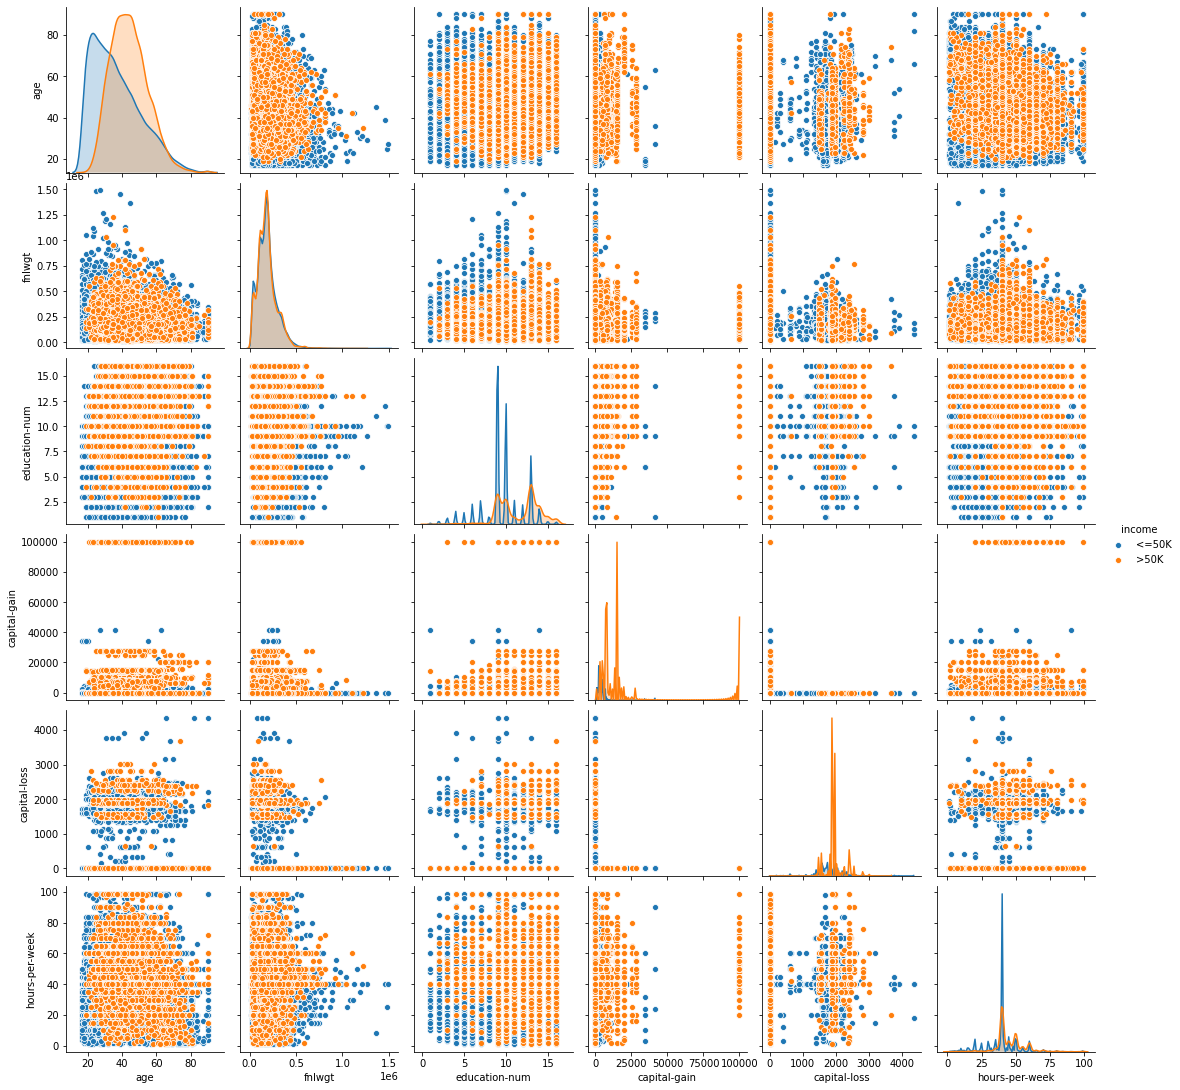

In [38]:
sns.pairplot(df, hue="income")

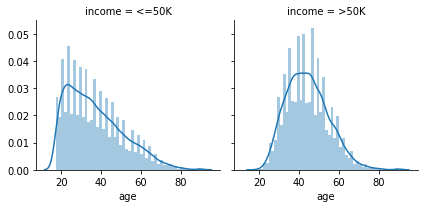

In [39]:
dist_plot('income','age')

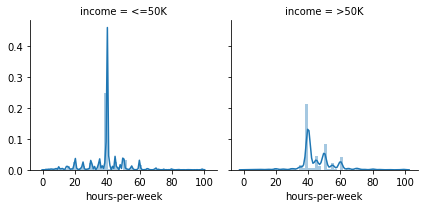

In [40]:
dist_plot('income','hours-per-week')

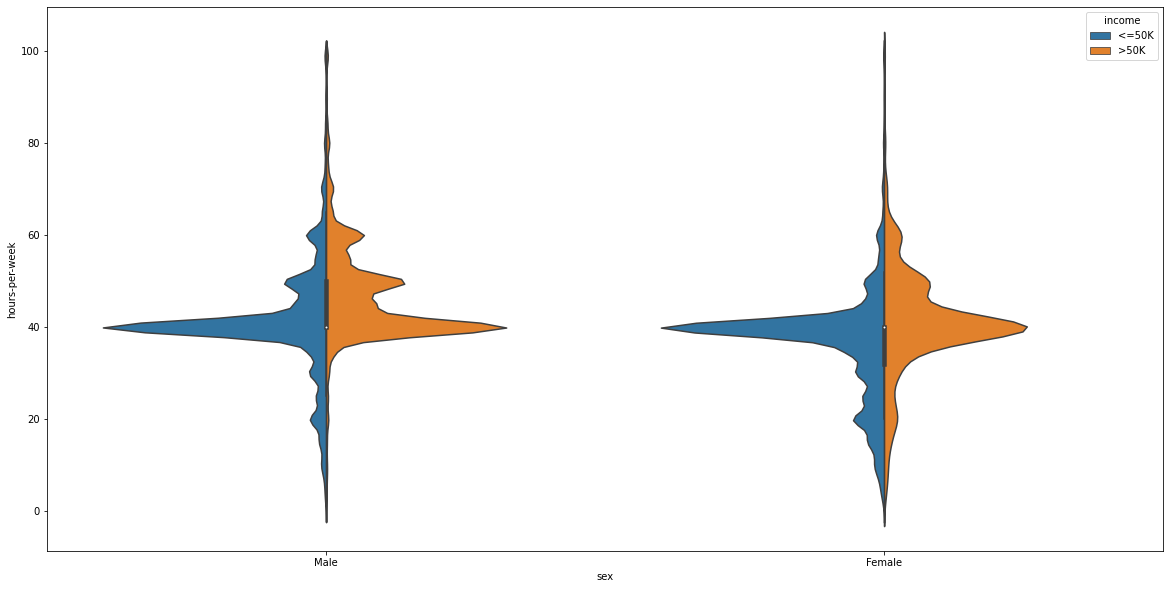

In [74]:
violin('sex','hours-per-week','income')

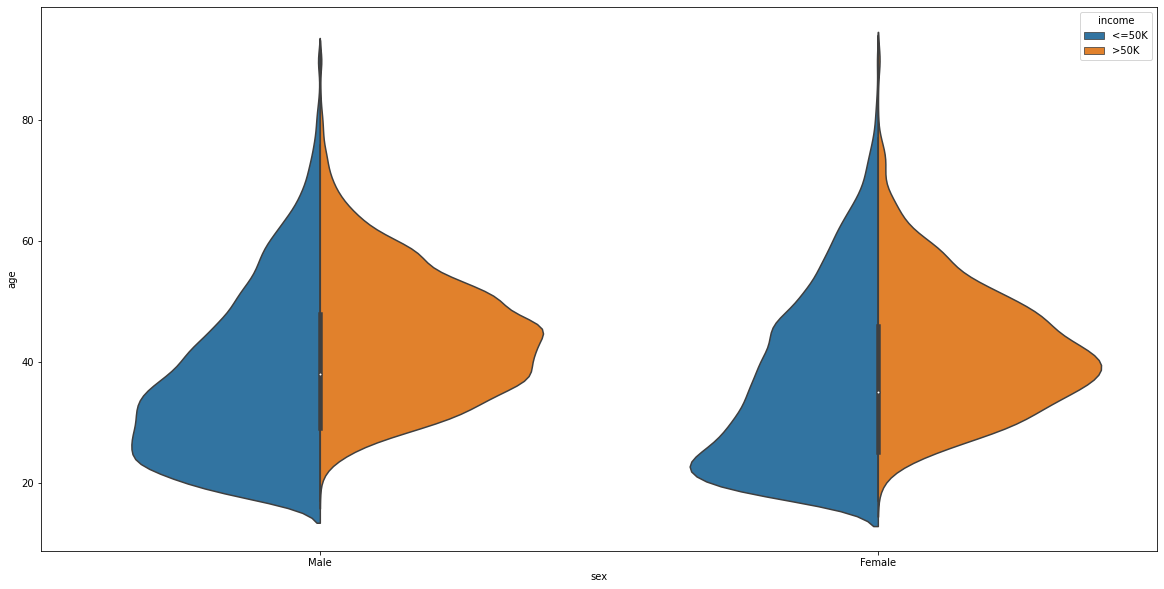

In [75]:
violin('sex','age','income')

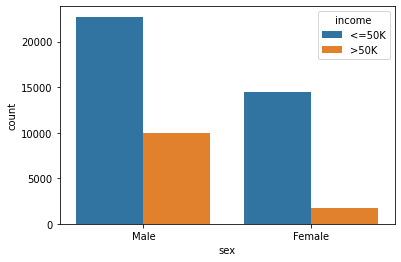

In [41]:
count_plot('sex',hue='income')

In [57]:
count('marital-status')

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

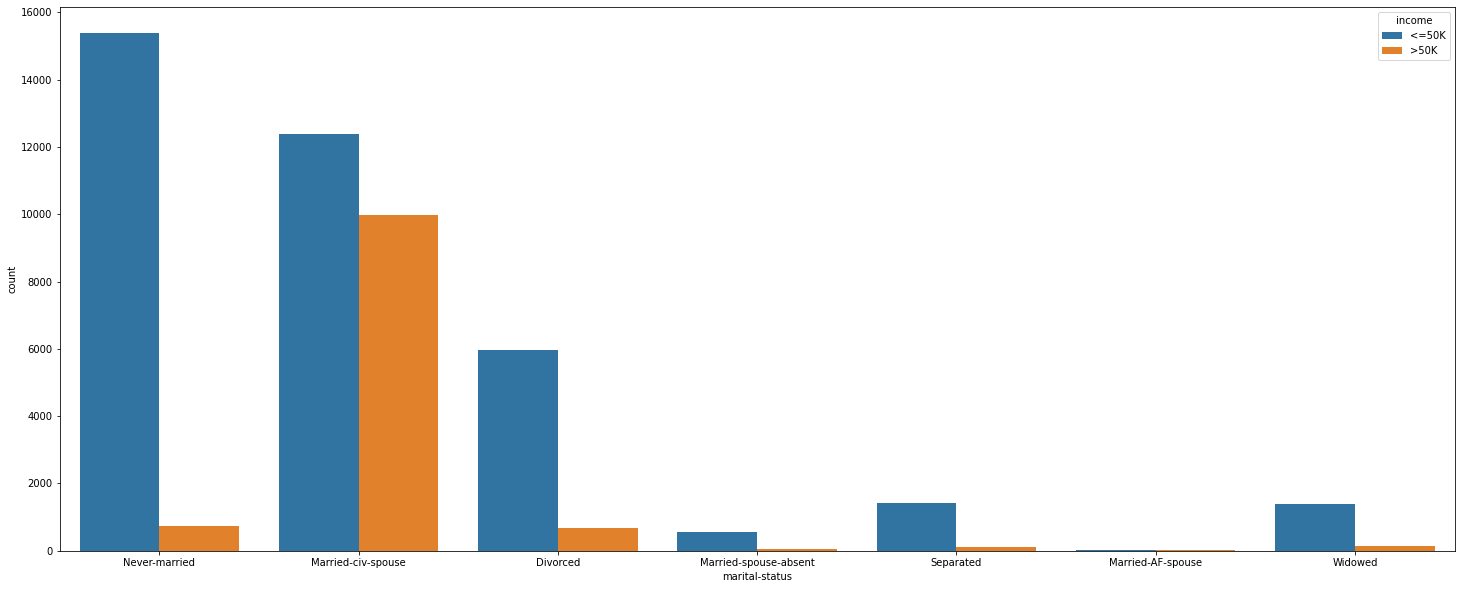

In [58]:
count_plot('marital-status',hue='income')

In [42]:
count('sex')

Male      32650
Female    16192
Name: sex, dtype: int64

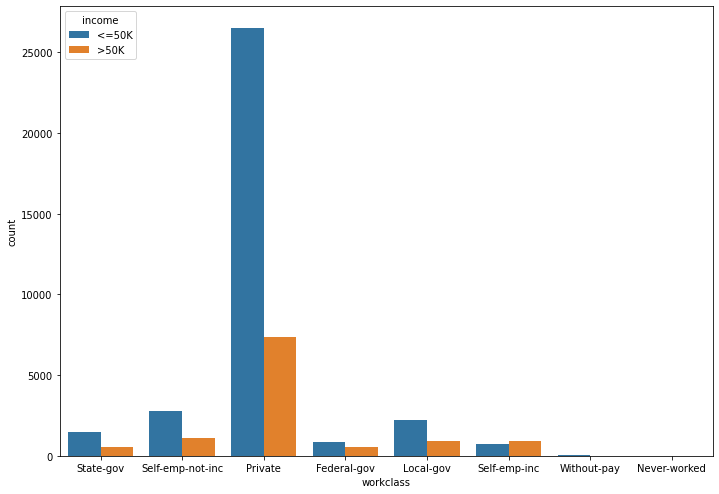

In [47]:
rcParams['figure.figsize'] = 11.7,8.27
count_plot('workclass',hue='income')

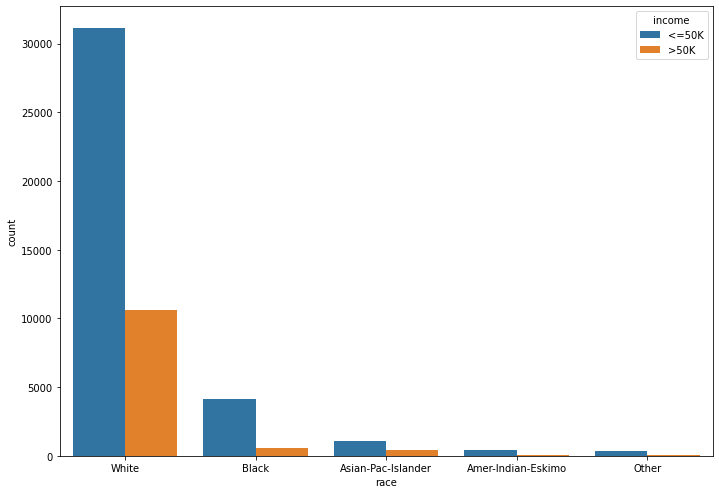

In [46]:
count_plot('race',hue='income')

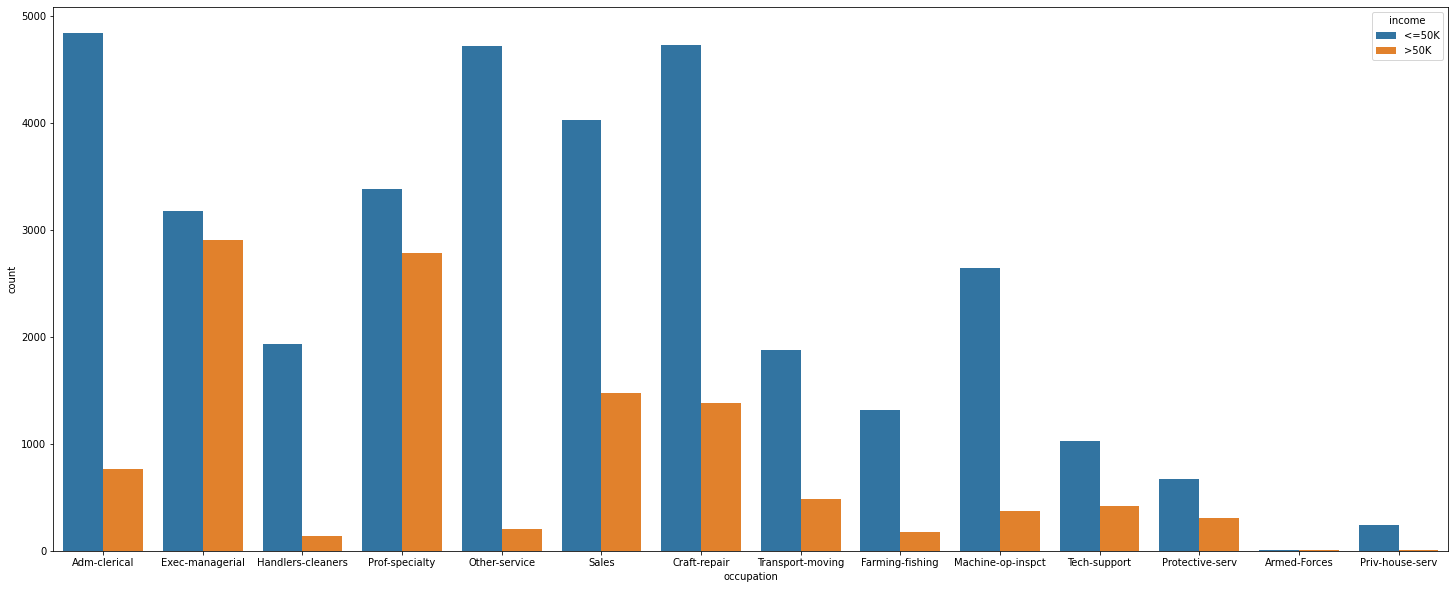

In [50]:
rcParams['figure.figsize'] = 25,10
count_plot('occupation',hue='income')

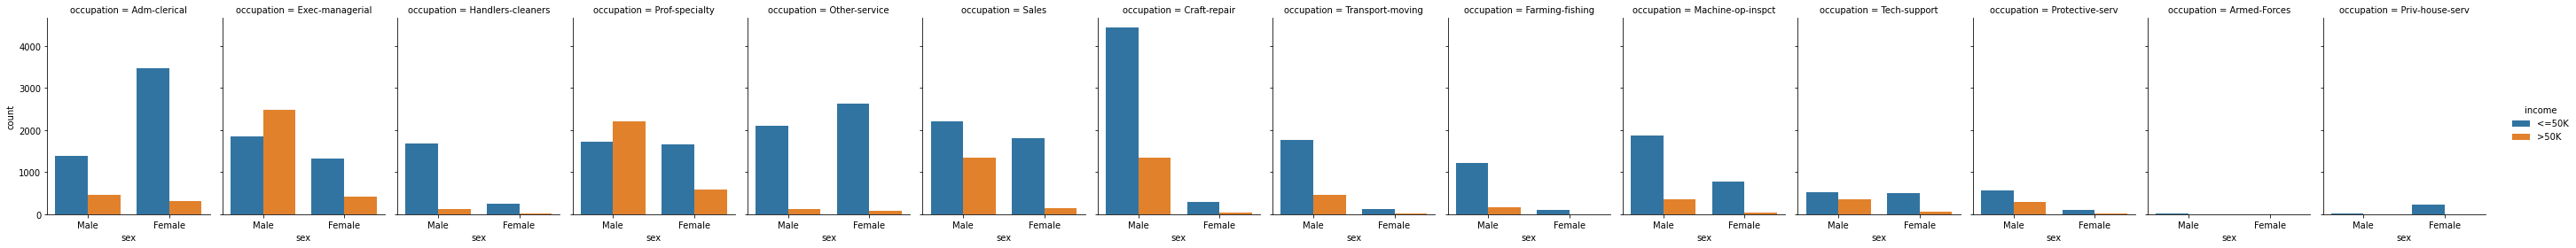

In [54]:
cat_plot('sex','income','occupation',4,0.7)

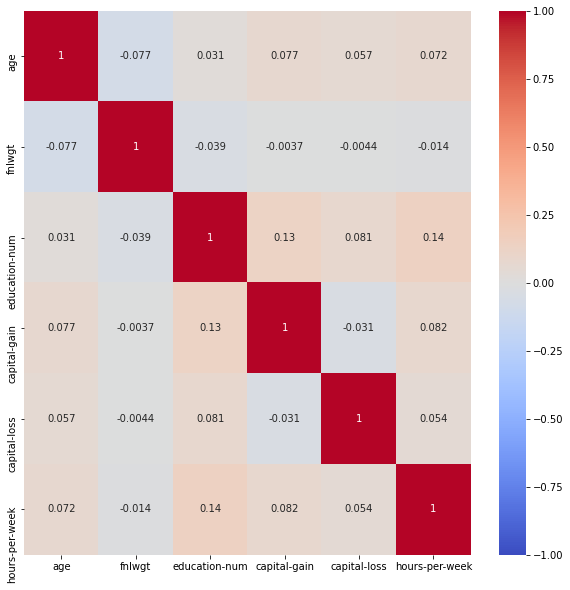

In [56]:
correlation(df,10,10, 'coolwarm')

# Classification task


Although we can develop classification algorithms to fill the nulls in workclass, occupation and native-country, however the quickest way to do that is to drop those rows that have NaNs. Since the time is limited I choose this approach.

In [0]:
df.dropna(subset = ['workclass', 'occupation', 'native-country'], inplace=True)

In [60]:
df.shape

(45222, 15)

In [61]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [0]:
df.drop(columns=['fnlwgt'],inplace=True)

In [63]:
count('income')

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [68]:
df_majority = df[df['income']=='<=50K']  #filtering for majority class
df_minority = df[df['income']=='>50K']  #filtering for minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=34014,    # to match majority class
                                 random_state=123)

#creating the balanced data set.
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['income'].value_counts()

<=50K    34014
>50K     34014
Name: income, dtype: int64

In [0]:
dic2={'<=50K':0,'>50K':1}
df_upsampled.replace({"income": dic2},inplace=True)

In [70]:
df_upsampled['income'].value_counts()

1    34014
0    34014
Name: income, dtype: int64

In [76]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [0]:
df_upsampled=pd.get_dummies(data=df_upsampled, columns=['workclass','education','marital-status','occupation','relationship',
                                          'race','sex','native-country'])

In [81]:
labels=df_upsampled['income']# defining teh label column

#train-test split
data_train, data_test, label_train, label_test = train_test_split(df_upsampled, labels, test_size=0.4, random_state=7)

#droping the label from train and test sets.
data_train=data_train.drop(labels=['income'],axis=1)
data_test=data_test.drop(labels=['income'],axis=1)

#defining the model
Model_RFC=RandomForestClassifier(n_estimators=10,oob_score=True)

#fitting the model
Model_RFC.fit(data_train,label_train)

#Calculating the feature importance
Model_RFC.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide



array([2.15282443e-01, 8.03027539e-02, 7.47815368e-02, 2.46694480e-02,
       1.04963376e-01, 4.97009957e-03, 6.13645499e-03, 1.08570406e-02,
       4.96148028e-03, 7.72083126e-03, 4.64258601e-03, 1.25906431e-04,
       1.50842934e-03, 2.11051162e-03, 7.34229061e-04, 2.28822660e-04,
       1.27650136e-03, 2.05533505e-03, 1.26157918e-03, 2.35829718e-03,
       2.55369550e-03, 9.23371908e-03, 2.46045314e-03, 6.23984316e-03,
       3.57821485e-03, 5.02337642e-05, 2.23459752e-03, 5.43903745e-03,
       6.73003114e-03, 5.90082544e-04, 5.27913182e-02, 1.79236348e-03,
       7.52604510e-02, 3.89764264e-03, 2.31062273e-03, 5.48322195e-03,
       3.40236309e-05, 6.64786095e-03, 1.81334732e-02, 4.57078278e-03,
       3.44238471e-03, 4.39936826e-03, 1.24236066e-02, 2.16972998e-04,
       1.77966632e-02, 2.68587855e-03, 7.24887612e-03, 4.02392795e-03,
       4.67511435e-03, 4.40284587e-02, 8.48357309e-03, 1.62855823e-03,
       2.87568693e-02, 8.61070008e-03, 1.61367913e-02, 1.70596163e-03,
      

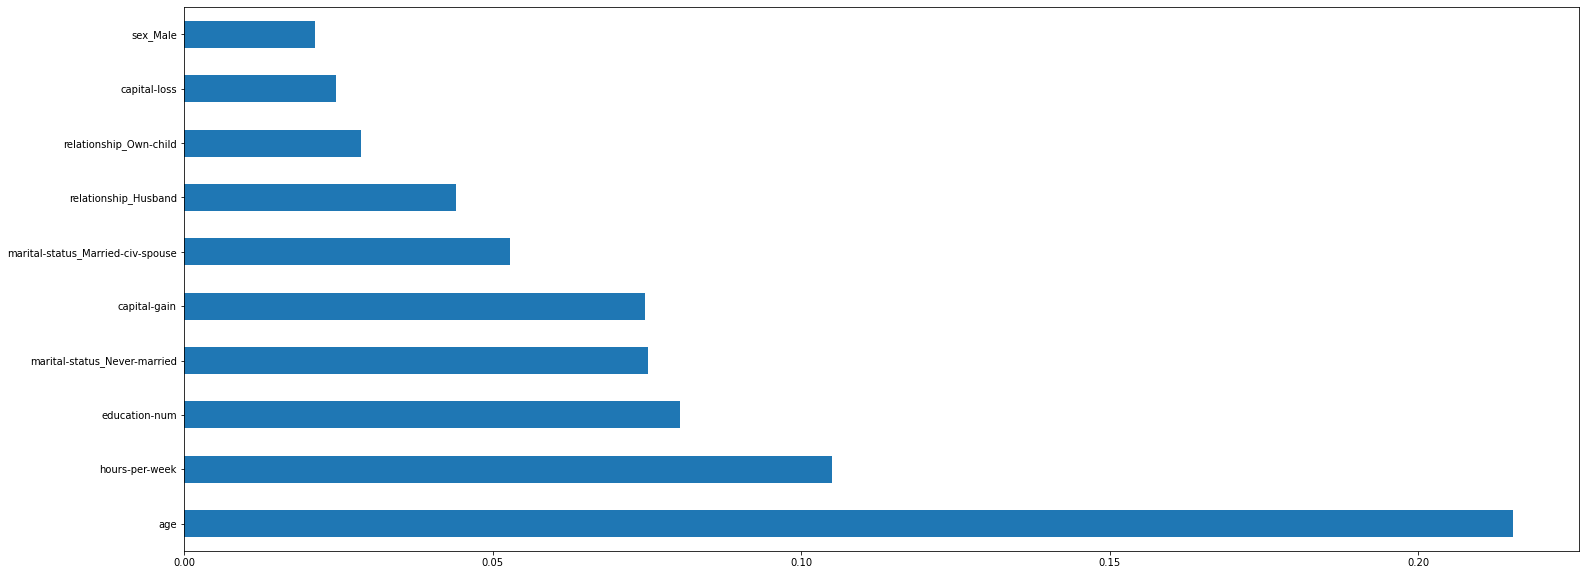

In [82]:
pd.Series(Model_RFC.feature_importances_, index=data_train.columns).nlargest(10).plot(kind='barh')

In [0]:
predictions=Model_RFC.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

Text(0.5, 1.0, 'Confusion Matrix')

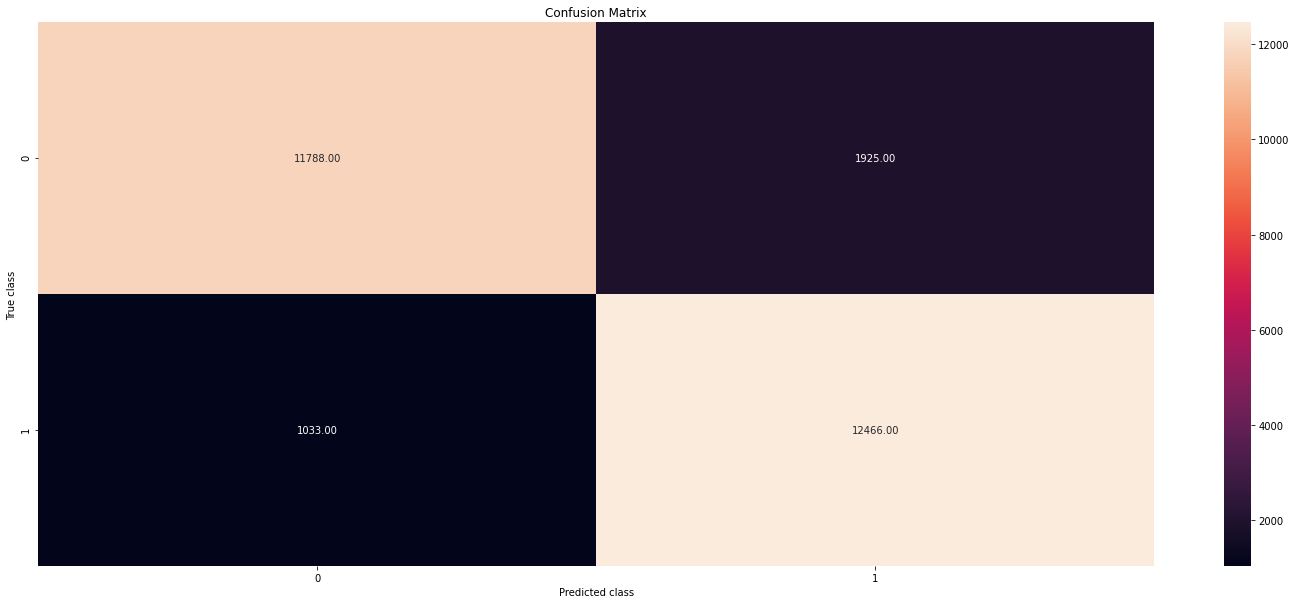

In [84]:
sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['0','1'] , 
            yticklabels = ['0','1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [85]:
print(classification_report(label_test, Model_RFC.predict(data_test)))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     13713
           1       0.87      0.92      0.89     13499

    accuracy                           0.89     27212
   macro avg       0.89      0.89      0.89     27212
weighted avg       0.89      0.89      0.89     27212



In [86]:
accuracy_score(label_test, predictions)

0.8912979567837719

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

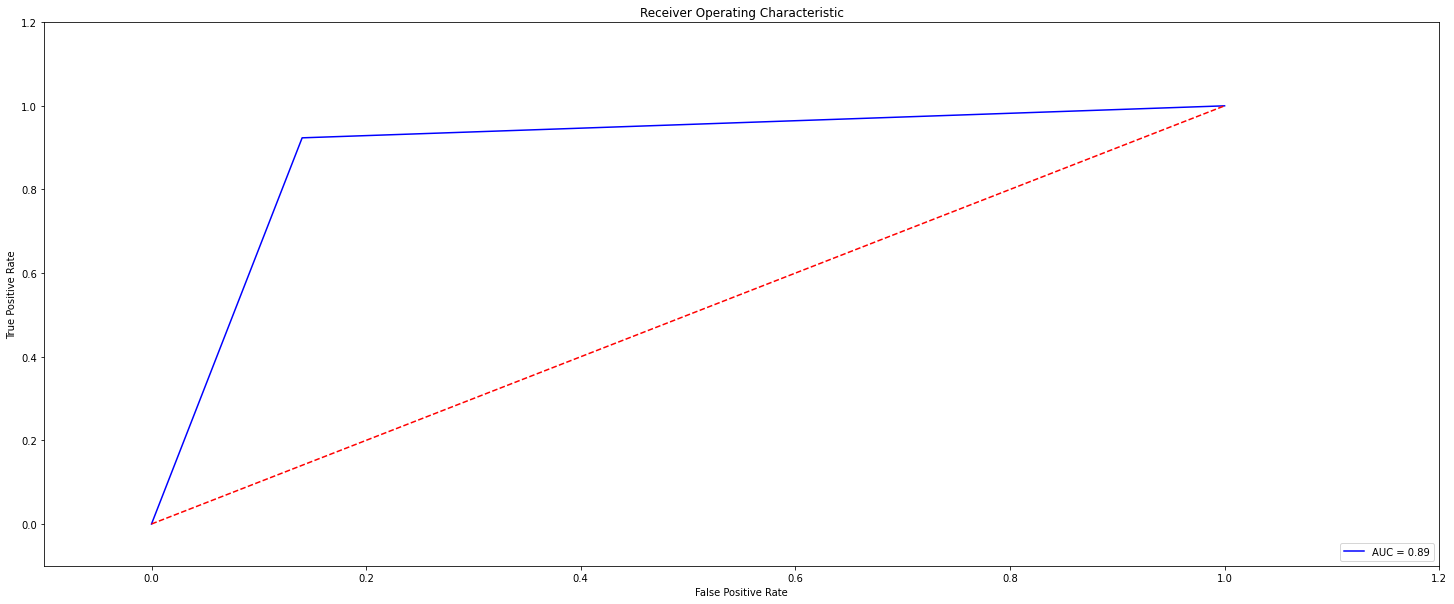

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Grid Search

In [90]:
print('Parameters currently in use:\n')
print(Model_RFC.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [92]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train,label_train)

rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.7min


KeyboardInterrupt: ignored

Grid search took too much time so I just intrrupted that to do the rest.

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(solver = 'lbfgs') #default solver is too slow that's why I changed it

In [97]:
logisticRegr.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logisticRegr.predict(data_test)

In [99]:
score = logisticRegr.score(data_test, label_test)
print(score)

0.7829633985006614


Text(0.5, 1.0, 'Confusion Matrix')

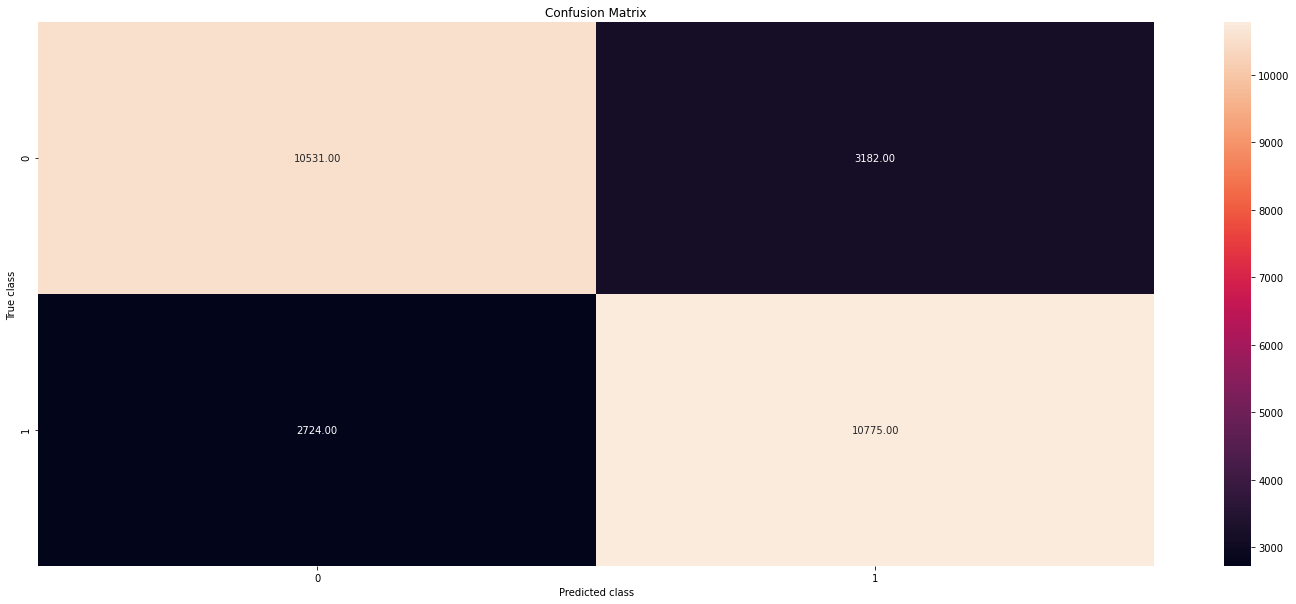

In [100]:
confusion=metrics.confusion_matrix(label_test, predictions)

sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['0','1'] , 
            yticklabels = ['0','1'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [101]:
print(classification_report(label_test, logisticRegr.predict(data_test)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     13713
           1       0.77      0.80      0.78     13499

    accuracy                           0.78     27212
   macro avg       0.78      0.78      0.78     27212
weighted avg       0.78      0.78      0.78     27212



In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

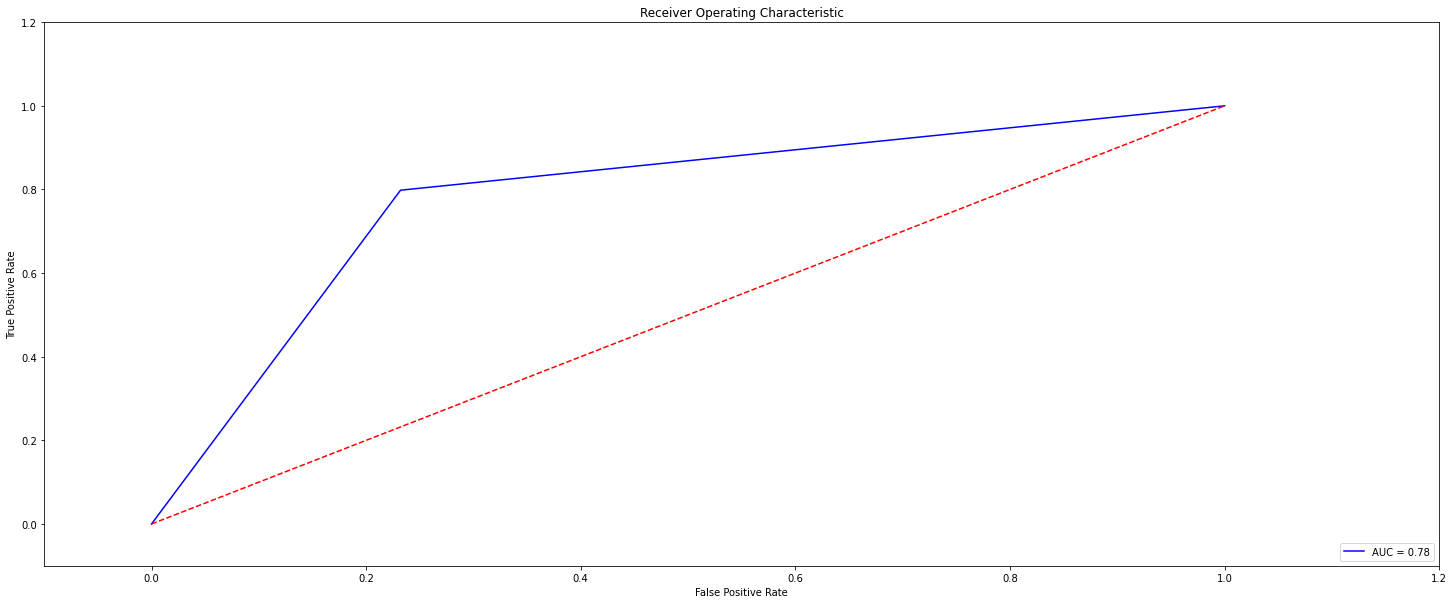

In [103]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Ideally we should do some hyperparameters tunning for logistic regression too and see if we can improve its performance and then compare it with our other model (random forest). However, out of the 2 models, random forest performed better so I will use it to perform the classification task with only top 3 features. 

I will do this as it is always one the goals of any machine learning development to predict the target with fewer number of variables/predictors. This is because if the model deals with many predictor variables, then there is a high chance that there are hidden relationships between some of them leading to redundancy and even if there is no relationship between any of them, the model can suffer from overfitting when there are a large number of predictor variables. In addition, a model that can predict with fewer number of predictor variables is more practical due to some consideration such as data availability, storage, computer resources, time taken for computation, etc. .

# Prediction using top 3 features

In [0]:
#Filtering for the top 3 features. 
df_3=df_upsampled[['age','hours-per-week','education-num','income']]

Text(0.5, 1.0, 'Confusion Matrix')

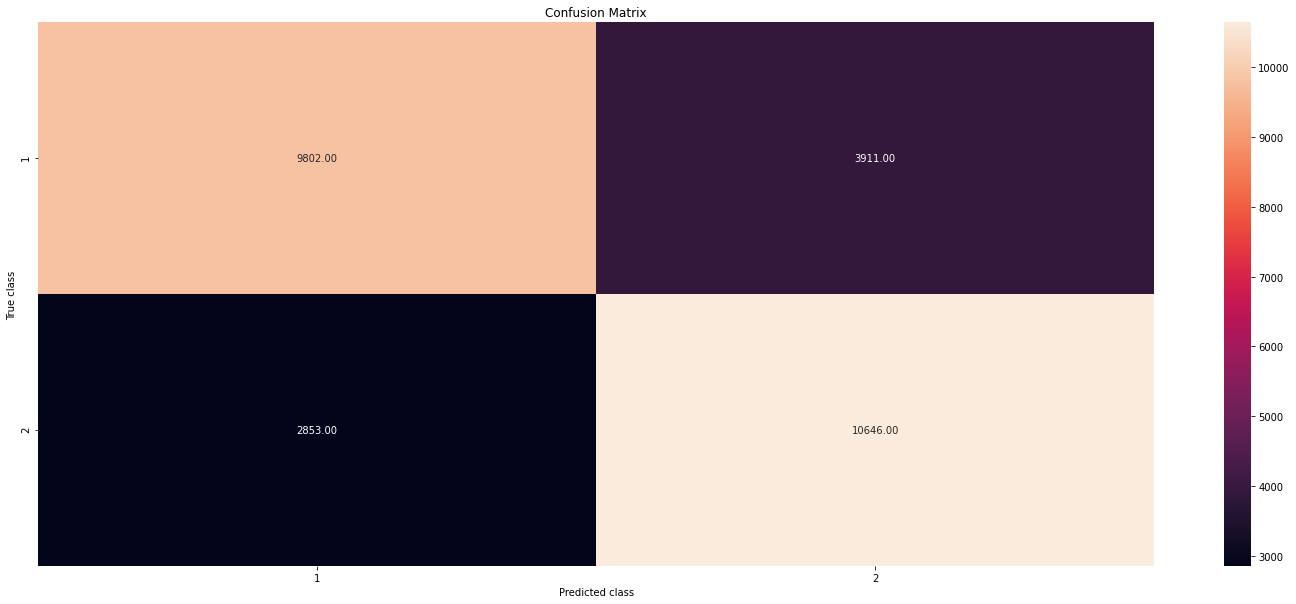

In [105]:
labels=df_3['income']
data_train, data_test, label_train, label_test = train_test_split(df_3, labels, test_size=0.4, random_state=7)
data_train=data_train.drop(labels=['income'],axis=1)
data_test=data_test.drop(labels=['income'],axis=1)
rfc_ht=RandomForestClassifier(n_estimators= 400,min_samples_split= 2, #here I just assumed that grid search is done and we found these values for hyperparameters
                                 min_samples_leaf= 1,
                                 max_features= 'auto',
                                 max_depth= None,
                                 bootstrap= False)

rfc_ht.fit(data_train,label_train)

predictions=rfc_ht.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['1','2'] , 
            yticklabels = ['1','2'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [107]:
print(classification_report(label_test, rfc_ht.predict(data_test)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     13713
           1       0.73      0.79      0.76     13499

    accuracy                           0.75     27212
   macro avg       0.75      0.75      0.75     27212
weighted avg       0.75      0.75      0.75     27212



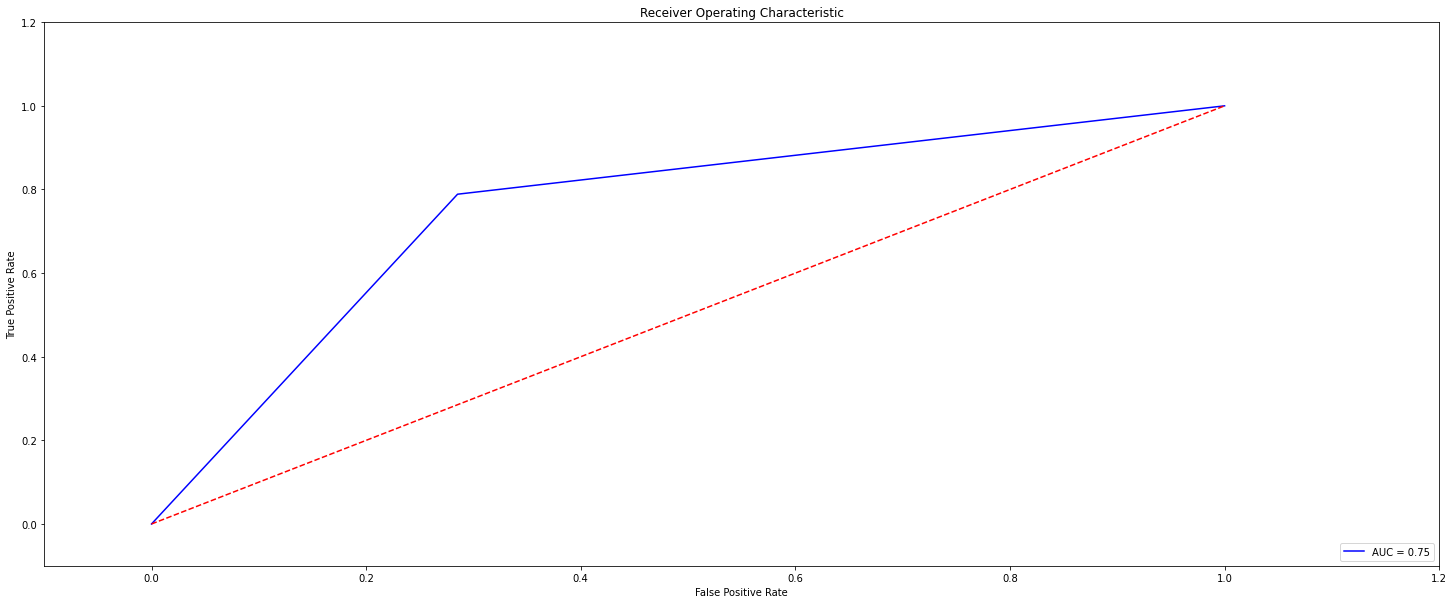

In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The model performance is still acceptable even when we used 3 features as predictors. 